In [1]:
import sys

In [2]:
#pip install requests

In [3]:
#pip install pandas

In [4]:
#!{sys.executable} -m pip install git+https://github.com/KinkyDesign/jaqpotpy

In [5]:
#pip install sklearn

In [6]:
#pip install matplotlib

In [7]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install git+https://github.com/KinkyDesign/jaqpotpy

In [8]:
import getpass
import requests
import sys
import http.client as http_client
import logging
import json
import pandas as pd
import numpy as np
from jaqpotpy import Jaqpot

In [9]:
user = "Hackathon"

pw = getpass.getpass("Login password for user '{}': ".format(user))

#url = "https://ssl.biomax.de/nanocommons/bioxm/rest/api"
url = "https://ssl.biomax.de/nanocommons_old/bioxm/rest/api"


proxies = {
  #'https': 'server:8080'
}

print("Opening session...")
response = requests.get(
    url + "/createUserSessionSimple?name={}&password={}".format(user, pw),
                        proxies=proxies)

session_id = ""
if response.status_code == 200:
    session_id = response.text
    print("Opened session " + session_id)
else:
    print("Failed to open session: " + str(response.text))
    sys.exit(1)

request_data= """
  {
    "SearchResultWithReportsRequest":
    {
      "firstIndex": 0,
      "maxCount": 100,
      "local": False,
      "viewName": "ivan",
      "query": {
          "queryName": "ivan"
      }
    }
  }
"""

try:               
    headers = {'Content-type': 'application/json'}

    http_client.HTTPConnection.debuglevel = 1

    logging.basicConfig()
    logging.getLogger().setLevel(logging.DEBUG)
    requests_log = logging.getLogger("requests.packages.urllib3")
    requests_log.setLevel(logging.DEBUG)
    requests_log.propagate = True

    response = requests.post(url + "/getSearchResultWithReports?userSessionId=" + session_id, data=request_data,
                           headers=headers, proxies=proxies)
    print("Status: " + str(response.status_code))

    if (response.status_code == 200):
#        print(response.text)
        json_data2 = json.loads(response.text)
        json_dataset2 = json_data2['SearchResultWithReports']['objectReports']

    else:
        print("ERROR:")
        print(response.text)
 

finally:
    response = requests.get(url + "/destroyUserSession?userSessionId=" + session_id, proxies=proxies)
    if (response.status_code == 200):
        print("\nClosed session.")
    else:
        print("\nError: Failed to close session " + session_id)

Login password for user 'Hackathon':  ·········


Opening session...
Opened session 964a00ac73d43e6544740563b763392d0af18b39


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ssl.biomax.de:443


send: b'POST /nanocommons_old/bioxm/rest/api/getSearchResultWithReports?userSessionId=964a00ac73d43e6544740563b763392d0af18b39 HTTP/1.1\r\nHost: ssl.biomax.de\r\nUser-Agent: python-requests/2.22.0\r\nAccept-Encoding: gzip, deflate\r\nAccept: */*\r\nConnection: keep-alive\r\nContent-type: application/json\r\nContent-Length: 208\r\n\r\n'
send: b'\n  {\n    "SearchResultWithReportsRequest":\n    {\n      "firstIndex": 0,\n      "maxCount": 100,\n      "local": False,\n      "viewName": "ivan",\n      "query": {\n          "queryName": "ivan"\n      }\n    }\n  }\n'
reply: 'HTTP/1.1 200 OK\r\n'
header: Date: Mon, 23 Dec 2019 16:48:38 GMT
header: Server: Apache-Coyote/1.1
header: Strict-Transport-Security: max-age=63072000; includeSubdomains
header: X-Frame-Options: SAMEORIGIN
header: X-Content-Type-Options: nosniff
header: Content-Type: application/json
header: Keep-Alive: timeout=15, max=100
header: Connection: Keep-Alive
header: Transfer-Encoding: chunked


DEBUG:urllib3.connectionpool:https://ssl.biomax.de:443 "POST /nanocommons_old/bioxm/rest/api/getSearchResultWithReports?userSessionId=964a00ac73d43e6544740563b763392d0af18b39 HTTP/1.1" 200 None


Status: 200


DEBUG:chardet.charsetprober:utf-8  confidence = 0.99
DEBUG:chardet.charsetprober:SHIFT_JIS Japanese confidence = 0.01
DEBUG:chardet.charsetprober:EUC-JP Japanese confidence = 0.01
DEBUG:chardet.charsetprober:GB2312 Chinese confidence = 0.01
DEBUG:chardet.charsetprober:EUC-KR Korean confidence = 0.01
DEBUG:chardet.charsetprober:CP949 Korean confidence = 0.01
DEBUG:chardet.charsetprober:Big5 Chinese confidence = 0.01
DEBUG:chardet.charsetprober:EUC-TW Taiwan confidence = 0.01
DEBUG:chardet.charsetprober:windows-1251 Russian confidence = 0.01
DEBUG:chardet.charsetprober:KOI8-R Russian confidence = 0.01
DEBUG:chardet.charsetprober:ISO-8859-5 Russian confidence = 0.0
DEBUG:chardet.charsetprober:MacCyrillic Russian confidence = 0.01
DEBUG:chardet.charsetprober:IBM866 Russian confidence = 0.01
DEBUG:chardet.charsetprober:IBM855 Russian confidence = 0.01
DEBUG:chardet.charsetprober:ISO-8859-7 Greek confidence = 0.01
DEBUG:chardet.charsetprober:windows-1253 Greek confidence = 0.01
DEBUG:chardet

send: b'GET /nanocommons_old/bioxm/rest/api/destroyUserSession?userSessionId=964a00ac73d43e6544740563b763392d0af18b39 HTTP/1.1\r\nHost: ssl.biomax.de\r\nUser-Agent: python-requests/2.22.0\r\nAccept-Encoding: gzip, deflate\r\nAccept: */*\r\nConnection: keep-alive\r\n\r\n'
reply: 'HTTP/1.1 200 OK\r\n'
header: Date: Mon, 23 Dec 2019 16:48:39 GMT
header: Server: Apache-Coyote/1.1
header: Strict-Transport-Security: max-age=63072000; includeSubdomains
header: X-Frame-Options: SAMEORIGIN
header: X-Content-Type-Options: nosniff
header: Content-Type: application/json
header: Keep-Alive: timeout=15, max=100
header: Connection: Keep-Alive
header: Transfer-Encoding: chunked


DEBUG:urllib3.connectionpool:https://ssl.biomax.de:443 "GET /nanocommons_old/bioxm/rest/api/destroyUserSession?userSessionId=964a00ac73d43e6544740563b763392d0af18b39 HTTP/1.1" 200 None



Closed session.


In [10]:
data_dict = {}
data_dict['Id'] = []
for dato in json_data2['SearchResultWithReports']['objectReports']:
    for atr in dato['attributes']:
        data_dict[atr['name']] = []

        
  
for dato in json_data2['SearchResultWithReports']['objectReports']:
    data_dict['Id'].append(dato["objectURL"])
    for key, value in data_dict.items():
        for atr in dato['attributes']: 
            if atr['name'] == key:
                try:
                    nr = atr['nestedReports']
                    data_dict[key].append(nr['attributes']['values'])
                except KeyError:
                    data_dict[key].append(None)
                    continue

    
df = pd.DataFrame(data_dict)
print(df)

                                  Id Particle ..Type               ..Coating  \
0    Experiment:Hackathon:HA_NP00262     None     Si               aminoacid   
1    Experiment:Hackathon:HA_NP00266     None     Si              aminoalkyl   
2    Experiment:Hackathon:HA_NP00269     None     Si               aminoacid   
3    Experiment:Hackathon:HA_NP00255     None     Ti                uncoated   
4    Experiment:Hackathon:HA_NP00256     None     Ti                     PVP   
5    Experiment:Hackathon:HA_NP00257     None     Ti                    F127   
6    Experiment:Hackathon:HA_NP00258     None     Ti                  AA4040   
7    Experiment:Hackathon:HA_NP00259     None     Ti                uncoated   
8    Experiment:Hackathon:HA_NP00260     None     Ti                uncoated   
9    Experiment:Hackathon:HA_NP00254     None     Ti                uncoated   
10   Experiment:Hackathon:HA_NP00193     None     Ce                uncoated   
11   Experiment:Hackathon:HA_NP00192    

***GETTING TOXICITY DATA***

In [11]:
user = "Hackathon"

pw = getpass.getpass("Login password for user '{}': ".format(user))

url = "https://ssl.biomax.de/nanocommons_old/bioxm/rest/api"

proxies = {
  #'https': 'server:8080'
}

print("Opening session...")
response = requests.get(url + "/createUserSessionSimple?name={}&password={}".format(user, pw),
                        proxies=proxies)

session_id = ""
if response.status_code == 200:
    session_id = response.text
    print("Opened session " + session_id)
else:
    print("Failed to open session: " + str(response.text))
    sys.exit(1)

request_data= """
  {
    "SearchResultWithReportsRequest":
    {
      "firstIndex": 0,
      "maxCount": 100,
      "local": True,
      "viewName": "Experiment - Toxicity by aliquot",
      "query": {
          "queryName": "Experiment - Toxicity - KIT IH A549"
      }
    }
  }
"""

try:               
    headers = {'Content-type': 'application/json'}

    http_client.HTTPConnection.debuglevel = 1

    logging.basicConfig()
    logging.getLogger().setLevel(logging.DEBUG)
    requests_log = logging.getLogger("requests.packages.urllib3")
    requests_log.setLevel(logging.DEBUG)
    requests_log.propagate = True

    response = requests.post(url + "/getSearchResultWithReports?userSessionId=" + session_id, data=request_data,
                           headers=headers, proxies=proxies)
    print("Status: " + str(response.status_code))

    if (response.status_code == 200):
        json_data2 = json.loads(response.text)

    else:
        print("ERROR:")
        print(response.text)
 

finally:
    response = requests.get(url + "/destroyUserSession?userSessionId=" + session_id, proxies=proxies)
    if (response.status_code == 200):
        print("\nClosed session.")
    else:
        print("\nError: Failed to close session " + session_id)

Login password for user 'Hackathon':  ·········


Opening session...


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ssl.biomax.de:443


send: b'GET /nanocommons_old/bioxm/rest/api/createUserSessionSimple?name=Hackathon&password=hackathon HTTP/1.1\r\nHost: ssl.biomax.de\r\nUser-Agent: python-requests/2.22.0\r\nAccept-Encoding: gzip, deflate\r\nAccept: */*\r\nConnection: keep-alive\r\n\r\n'
reply: 'HTTP/1.1 200 OK\r\n'
header: Date: Mon, 23 Dec 2019 16:48:43 GMT
header: Server: Apache-Coyote/1.1
header: Strict-Transport-Security: max-age=63072000; includeSubdomains
header: X-Frame-Options: SAMEORIGIN
header: X-Content-Type-Options: nosniff
header: Content-Type: application/json
header: Content-Length: 40
header: Keep-Alive: timeout=15, max=100
header: Connection: Keep-Alive


DEBUG:urllib3.connectionpool:https://ssl.biomax.de:443 "GET /nanocommons_old/bioxm/rest/api/createUserSessionSimple?name=Hackathon&password=hackathon HTTP/1.1" 200 40


Opened session 99ecf742109476b0ac2d8552bf63b5e85a517985


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ssl.biomax.de:443


send: b'POST /nanocommons_old/bioxm/rest/api/getSearchResultWithReports?userSessionId=99ecf742109476b0ac2d8552bf63b5e85a517985 HTTP/1.1\r\nHost: ssl.biomax.de\r\nUser-Agent: python-requests/2.22.0\r\nAccept-Encoding: gzip, deflate\r\nAccept: */*\r\nConnection: keep-alive\r\nContent-type: application/json\r\nContent-Length: 266\r\n\r\n'
send: b'\n  {\n    "SearchResultWithReportsRequest":\n    {\n      "firstIndex": 0,\n      "maxCount": 100,\n      "local": True,\n      "viewName": "Experiment - Toxicity by aliquot",\n      "query": {\n          "queryName": "Experiment - Toxicity - KIT IH A549"\n      }\n    }\n  }\n'
reply: 'HTTP/1.1 200 OK\r\n'
header: Date: Mon, 23 Dec 2019 16:48:43 GMT
header: Server: Apache-Coyote/1.1
header: Strict-Transport-Security: max-age=63072000; includeSubdomains
header: X-Frame-Options: SAMEORIGIN
header: X-Content-Type-Options: nosniff
header: Content-Type: application/json
header: Keep-Alive: timeout=15, max=100
header: Connection: Keep-Alive
header: T

DEBUG:urllib3.connectionpool:https://ssl.biomax.de:443 "POST /nanocommons_old/bioxm/rest/api/getSearchResultWithReports?userSessionId=99ecf742109476b0ac2d8552bf63b5e85a517985 HTTP/1.1" 200 None


Status: 200


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ssl.biomax.de:443


send: b'GET /nanocommons_old/bioxm/rest/api/destroyUserSession?userSessionId=99ecf742109476b0ac2d8552bf63b5e85a517985 HTTP/1.1\r\nHost: ssl.biomax.de\r\nUser-Agent: python-requests/2.22.0\r\nAccept-Encoding: gzip, deflate\r\nAccept: */*\r\nConnection: keep-alive\r\n\r\n'
reply: 'HTTP/1.1 200 OK\r\n'
header: Date: Mon, 23 Dec 2019 16:48:44 GMT
header: Server: Apache-Coyote/1.1
header: Strict-Transport-Security: max-age=63072000; includeSubdomains
header: X-Frame-Options: SAMEORIGIN
header: X-Content-Type-Options: nosniff
header: Content-Type: application/json
header: Keep-Alive: timeout=15, max=100
header: Connection: Keep-Alive
header: Transfer-Encoding: chunked


DEBUG:urllib3.connectionpool:https://ssl.biomax.de:443 "GET /nanocommons_old/bioxm/rest/api/destroyUserSession?userSessionId=99ecf742109476b0ac2d8552bf63b5e85a517985 HTTP/1.1" 200 None



Closed session.


In [12]:
data_dictTox = {}
data_dictTox['Id'] = []
for dato in json_data2['SearchResultWithReports']['objectReports']:
    for atr in dato['attributes']:
        data_dictTox[atr['name']] = []

        
  
for dato in json_data2['SearchResultWithReports']['objectReports']:
    data_dictTox['Id'].append(dato["objectURL"])
    for key, value in data_dictTox.items():
        for atr in dato['attributes']: 
            if atr['name'] == key:
                try:
                    nr = atr['nestedReports']
                    data_dictTox[key].append(nr['attributes'])
                except KeyError:
                    data_dictTox[key].append(None)
                    continue

    
dfTox = pd.DataFrame(data_dictTox)
print(dfTox)

                          Id Aliquot  \
0   Element:Aliquot:AL000455    None   
1   Element:Aliquot:AL000454    None   
2   Element:Aliquot:AL000456    None   
3   Element:Aliquot:AL000457    None   
4   Element:Aliquot:AL000458    None   
5   Element:Aliquot:AL000124    None   
6   Element:Aliquot:AL000136    None   
7   Element:Aliquot:AL000146    None   
8   Element:Aliquot:AL000156    None   
9   Element:Aliquot:AL000161    None   
10  Element:Aliquot:AL000459    None   
11  Element:Aliquot:AL000114    None   
12  Element:Aliquot:AL000041    None   
13  Element:Aliquot:AL000022    None   
14  Element:Aliquot:AL000194    None   
15  Element:Aliquot:AL000204    None   
16  Element:Aliquot:AL000081    None   
17  Element:Aliquot:AL000084    None   

                                            _Particle  \
0                                                None   
1   [{'name': 'Particle', 'type': 'object', 'error...   
2   [{'name': 'Particle', 'type': 'object', 'error...   
3   [{'name

Preprocessing Y values - Formatting toxicity data as dataframe

In [13]:
dfToxNames=dfTox['_Particle']
CompoundNames={}
coumpountDict = {}
for compound in range(1,len(dfToxNames)):
    coumpountDict[compound] = dfToxNames[compound][0]['values']

CompoundNames['particle'] = coumpountDict
  
print(CompoundNames)

{'particle': {1: 'NP00375', 2: 'NP00262', 3: 'NP00266', 4: 'NP00269', 5: 'NP00255', 6: 'NP00256', 7: 'NP00257', 8: 'NP00258', 9: 'NP00259', 10: 'NP00260', 11: 'NP00254', 12: 'NP00193', 13: 'NP00192', 14: 'NP00282', 15: 'NP00283', 16: 'NP00214', 17: 'NP00214'}}


In [14]:
dfTox2=dfTox['_Toxicity.A549_Dose_39.1_IH']
ViableCellCount={}
i=0
for compound in range(len(dfTox2)):
    df3=dfTox2[compound]
    df5=pd.DataFrame(df3, columns =['name','values'])
    ViableCellCount[compound]=df5.iloc[0]['values']

In [15]:
ViableCellCount

{0: nan,
 1: nan,
 2: 1.422835941,
 3: -0.401260535,
 4: 2.434066141,
 5: -0.040606937,
 6: 0.084394911,
 7: 0.057642569,
 8: 0.284920008,
 9: -0.450941764,
 10: 0.525510532,
 11: -0.213755604,
 12: 0.247470485,
 13: 0.818199323,
 14: -7.30424163,
 15: -9.238114492,
 16: -16.06765605,
 17: -16.06765605}

In [16]:
dictF = {}
dictF['ViableCellCount']=ViableCellCount
ViableCellCountdf = pd.DataFrame.from_dict(dictF)
print(ViableCellCountdf)
dfNames = pd.DataFrame.from_dict(CompoundNames)
print(dfNames)
hackathonToxdata2 = pd.concat([dfNames, ViableCellCountdf], axis=1)
print(hackathonToxdata2)

    ViableCellCount
0               NaN
1               NaN
2          1.422836
3         -0.401261
4          2.434066
5         -0.040607
6          0.084395
7          0.057643
8          0.284920
9         -0.450942
10         0.525511
11        -0.213756
12         0.247470
13         0.818199
14        -7.304242
15        -9.238114
16       -16.067656
17       -16.067656
   particle
1   NP00375
2   NP00262
3   NP00266
4   NP00269
5   NP00255
6   NP00256
7   NP00257
8   NP00258
9   NP00259
10  NP00260
11  NP00254
12  NP00193
13  NP00192
14  NP00282
15  NP00283
16  NP00214
17  NP00214
   particle  ViableCellCount
0       NaN              NaN
1   NP00375              NaN
2   NP00262         1.422836
3   NP00266        -0.401261
4   NP00269         2.434066
5   NP00255        -0.040607
6   NP00256         0.084395
7   NP00257         0.057643
8   NP00258         0.284920
9   NP00259        -0.450942
10  NP00260         0.525511
11  NP00254        -0.213756
12  NP00193         0.24747

In [17]:
#Removing the 2 top rows as they do not contain values
hackathonToxdata2=hackathonToxdata2.drop(hackathonToxdata2.index[[0,1]])
hackathonToxdata2.index=range(len(hackathonToxdata2))
Yall=hackathonToxdata2['ViableCellCount']
Yall=Yall.drop(Yall.index[[13]])
Yall.index=range(len(Yall))
Yall

0      1.422836
1     -0.401261
2      2.434066
3     -0.040607
4      0.084395
5      0.057643
6      0.284920
7     -0.450942
8      0.525511
9     -0.213756
10     0.247470
11     0.818199
12    -7.304242
13   -16.067656
14   -16.067656
Name: ViableCellCount, dtype: float64

Transforming the Viable Cells Count values into binned values (to be used in classification)  

In [18]:
YallBins=pd.cut(Yall, [ -16.086,-1.266,0,2.435])
print(YallBins.dtypes)
#YallBins
YallBins.dtypes

category


CategoricalDtype(categories=[(-16.086, -1.266], (-1.266, 0.0], (0.0, 2.435]],
              ordered=True)

In [19]:
YallBins

0          (0.0, 2.435]
1         (-1.266, 0.0]
2          (0.0, 2.435]
3         (-1.266, 0.0]
4          (0.0, 2.435]
5          (0.0, 2.435]
6          (0.0, 2.435]
7         (-1.266, 0.0]
8          (0.0, 2.435]
9         (-1.266, 0.0]
10         (0.0, 2.435]
11         (0.0, 2.435]
12    (-16.086, -1.266]
13    (-16.086, -1.266]
14    (-16.086, -1.266]
Name: ViableCellCount, dtype: category
Categories (3, interval[float64]): [(-16.086, -1.266] < (-1.266, 0.0] < (0.0, 2.435]]

In [20]:
#Encoding the ViableCellCount bins as integers
from sklearn                        import metrics
from sklearn.linear_model           import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn import utils

training_scores_Y=YallBins

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(training_scores_Y)
print(training_scores_encoded)
print(training_scores_Y.dtypes)
print(utils.multiclass.type_of_target(training_scores_Y))
print(utils.multiclass.type_of_target(training_scores_encoded))

[2 1 2 1 2 2 2 1 2 1 2 2 0 0 0]
category
unknown
multiclass


In [21]:
print("NumPy array:")
#print(training_scores_encoded)
training_scores_encoded=np.ravel(training_scores_encoded)
print(training_scores_encoded)
training_scores_encodedPD = pd.Series(training_scores_encoded)
print("Converted Pandas series:")
print(training_scores_encodedPD)

NumPy array:
[2 1 2 1 2 2 2 1 2 1 2 2 0 0 0]
Converted Pandas series:
0     2
1     1
2     2
3     1
4     2
5     2
6     2
7     1
8     2
9     1
10    2
11    2
12    0
13    0
14    0
dtype: int64


In [22]:
training_scores_encodedPD=training_scores_encodedPD.to_frame(name=None)
training_scores_encodedPD.columns=['ViableCellBins']
training_scores_encodedPD= pd.DataFrame(training_scores_encodedPD)
training_scores_encodedPD

,ViableCellBins
0,2
1,1
2,2
3,1
4,2
5,2
6,2
7,1
8,2
9,1


Preprocessing X values

In [23]:
Xall_BIO=df
Xall_BIO=Xall_BIO.drop(['_.DLS SD (nm)','_.PDI SD','_.Zeta SD (mV)','_.Electrophoretic mobiliy SD (µmcm/Vs)','_.TEM (nm)',
                        '_.TEM SD (nm)','_.TEM Shortest (nm)','_.TEM Shortest SD (nm)','_.TEM Longest (nm)',
                        '_.TEM Longest SD (nm)','_.STEM (nm)','_.STEM SD (nm)','_.BET (m^2/g)','_.BET SD(m^2/g)',
                        '_.Energy Band Gap (eV)'],axis=1)
Xall_BIO=Xall_BIO.drop(Xall_BIO.index[[13]])
Xall_BIO=Xall_BIO.drop(['Id','Particle'],axis=1)
Xall_BIO.index=range(len(Xall_BIO))
Xall_BIO

,..Type,..Coating,..Type of Coating,..Surface Modification,..Shape,_.Nominal Size (nm),_.DLS (nm),_.PDI,_.Zeta (mV),_.Electrophoretic mobiliy (µmcm/Vs),_.Geometric Surface Area (nm2)
0,Si,aminoacid,neutral,None,Spherical,20,28.90,0.110,-21.80,0.0879,1206.874234
1,Si,aminoalkyl,positive,None,Spherical,20,23.48,0.172,25.90,2.0300,1206.874234
2,Si,aminoacid,negative,None,Spherical,20,25.24,0.174,-31.70,-2.4840,1206.874234
3,Ti,uncoated,uncoated,None,Spherical,10,1325.00,0.277,20.50,1.6050,180.271745
4,Ti,PVP,neutral,None,Square/Spherical/Rods,10,3185.00,0.240,17.30,1.3610,224.541375
5,Ti,F127,neutral,None,Square,10,4391.00,0.172,5.30,0.4158,325.380000
6,Ti,AA4040,neutral,None,Square,10,3109.00,0.177,17.10,1.3440,1159.260000
7,Ti,uncoated,uncoated,hydrophobic rutile,Nanorods,20,1609.00,0.895,23.00,1.8040,2828.925645
8,Ti,uncoated,uncoated,hydrophilic rutile,Nanorods,20,403.00,0.810,25.30,1.9810,4404.764228
9,Ti,uncoated,uncoated,None,Spherical/ Square,70,172.40,0.183,41.00,3.2170,3532.494233


In [24]:
#Encode the categories into numerical values
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
LE.fit(Xall_BIO['..Type'])
Xall_BIO['..Type']= LE.transform(Xall_BIO['..Type'])

LE.fit(Xall_BIO['..Coating'])
Xall_BIO['..Coating']= LE.transform(Xall_BIO['..Coating'])

LE.fit(Xall_BIO['..Type of Coating'])
Xall_BIO['..Type of Coating']= LE.transform(Xall_BIO['..Type of Coating'])

LE.fit(Xall_BIO['..Shape'])
Xall_BIO['..Shape']= LE.transform(Xall_BIO['..Shape'])

Xall_BIO['..Surface Modification']=Xall_BIO['..Surface Modification'].astype(str)
LE.fit(Xall_BIO['..Surface Modification'])
Xall_BIO['..Surface Modification']= LE.transform(Xall_BIO['..Surface Modification'])

One last look at the X and Y data

In [25]:
training_scores_encodedPD

,ViableCellBins
0,2
1,1
2,2
3,1
4,2
5,2
6,2
7,1
8,2
9,1


In [26]:
Xall_BIO

,..Type,..Coating,..Type of Coating,..Surface Modification,..Shape,_.Nominal Size (nm),_.DLS (nm),_.PDI,_.Zeta (mV),_.Electrophoretic mobiliy (µmcm/Vs),_.Geometric Surface Area (nm2)
0,2,3,1,0,2,20,28.90,0.110,-21.80,0.0879,1206.874234
1,2,4,2,0,2,20,23.48,0.172,25.90,2.0300,1206.874234
2,2,3,0,0,2,20,25.24,0.174,-31.70,-2.4840,1206.874234
3,3,5,3,0,2,10,1325.00,0.277,20.50,1.6050,180.271745
4,3,2,1,0,5,10,3185.00,0.240,17.30,1.3610,224.541375
5,3,1,1,0,4,10,4391.00,0.172,5.30,0.4158,325.380000
6,3,0,1,0,4,10,3109.00,0.177,17.10,1.3440,1159.260000
7,3,5,3,2,1,20,1609.00,0.895,23.00,1.8040,2828.925645
8,3,5,3,1,1,20,403.00,0.810,25.30,1.9810,4404.764228
9,3,5,3,0,3,70,172.40,0.183,41.00,3.2170,3532.494233


In [27]:
clf = LogisticRegressionCV(cv=8, random_state=0,multi_class='auto').fit(Xall_BIO,training_scores_encodedPD)

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/philip/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
/Users/philip/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/philip/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/

In [28]:
clf.predict(Xall_BIO)

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0])

In [29]:
clf.predict_proba(Xall_BIO).shape

(15, 3)

In [30]:
clf.score(Xall_BIO,training_scores_encodedPD)

0.8

In [31]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [32]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = Ynames
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[3 0 0]
 [0 2 2]
 [0 1 7]]


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x1a170f7950>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x1a170f7950>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.5  0.5 ]
 [0.   0.12 0.88]]


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x1a16014790>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x1a16014790>
DEBUG:matplotlib.colorbar:Setting pcolormesh


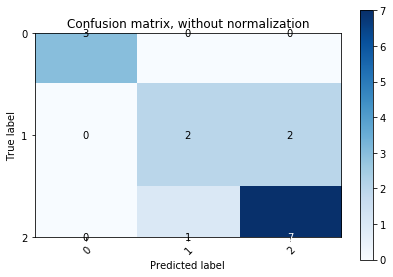

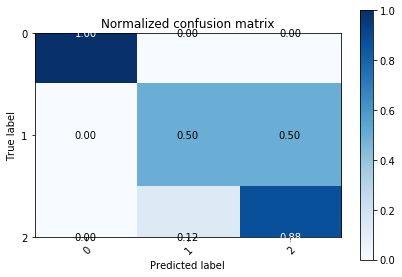

Accuracy : 0.8


In [33]:
y_pred_test=clf.predict(Xall_BIO)
y_test=training_scores_encodedPD
Ynames=['0','1','2']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_test, classes=Ynames,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_test, classes=Ynames, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
#print("Accuracy -TRAIN:",metrics.accuracy_score(y_train, y_pred))
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_test))

In [ ]:
from jaqpotpy import Jaqpot
jaqpot = Jaqpot("https://api.jaqpot.org/jaqpot/services/")
jaqpot.request_key_safe()

In [ ]:
clf.score(Xall_BIO,training_scores_encodedPD)
url=jaqpot.deploy_pipeline(clf,Xall_BIO,training_scores_encodedPD,"Jaqpot+Biomax: D4.6 example on hackathon data","Logistic Regression","linearmodel")

In [40]:
url

'Ou8zwphAQOJ8uzWTWRM9'

In [ ]:
dfJQ_Biomax, predicts_Biomax = jaqpot.predict(Xall_BIO, modelId=url)

In [41]:
predicts_Biomax

'ViableCellBins'

In [39]:
dfJQ_Biomax

,..Shape,_.DLS (nm),_.Nominal Size (nm),..Type,_.PDI,_.Zeta (mV),_.Geometric Surface Area (nm2),..Type of Coating,_.Electrophoretic mobiliy (µmcm/Vs),..Coating,..Surface Modification,ViableCellBins
0,2,28.90,20,2,0.110,-21.80,1206.874234,1,0.0879,3,0,2
1,2,23.48,20,2,0.172,25.90,1206.874234,2,2.0300,4,0,2
2,2,25.24,20,2,0.174,-31.70,1206.874234,0,-2.4840,3,0,2
3,2,1325.00,10,3,0.277,20.50,180.271745,3,1.6050,5,0,1
4,5,3185.00,10,3,0.240,17.30,224.541375,1,1.3610,2,0,2
5,4,4391.00,10,3,0.172,5.30,325.380000,1,0.4158,1,0,2
6,4,3109.00,10,3,0.177,17.10,1159.260000,1,1.3440,0,0,2
7,1,1609.00,20,3,0.895,23.00,2828.925645,3,1.8040,5,2,2
8,1,403.00,20,3,0.810,25.30,4404.764228,3,1.9810,5,1,2
9,3,172.40,70,3,0.183,41.00,3532.494233,3,3.2170,5,0,1
